# **Generalised Regression**

In this notebook, we will build a generalised regression model on the **electricity consumption** dataset. The dataset contains two variables - year and electricity consumption.

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [2]:
from google.colab import files
uploaded = files.upload()

Saving total-electricity-consumption-us.csv to total-electricity-consumption-us.csv


In [3]:
#fetching data
elec_cons = pd.read_csv("total-electricity-consumption-us.csv",  sep = ',', header= 0 )
elec_cons.head()

,Year,Consumption
0,1920,57125
1,1921,53656
2,1922,61816
3,1923,72113
4,1924,76651


In [4]:
# number of observations: 51
elec_cons.shape

(51, 2)

In [5]:
# checking NA
# there are no missing values in the dataset
elec_cons.isnull().values.any()

False

In [6]:
size = len(elec_cons.index)
index = range(0, size, 5)

train = elec_cons[~elec_cons.index.isin(index)]
test = elec_cons[elec_cons.index.isin(index)]

In [7]:
print(len(train))
print(len(test))

40
11


In [9]:
# converting X to a two dimensional array, as required by the learning algorithm
X_train = train.Year.values.reshape(-1,1) #Making X two dimensional
y_train = train.Consumption

X_test = test.Year.values.reshape(-1,1) #Making X two dimensional
y_test = test.Consumption

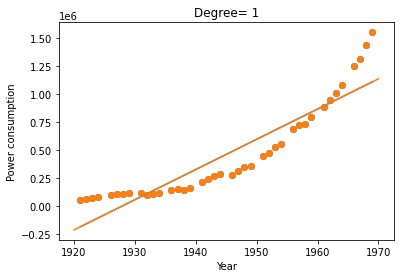

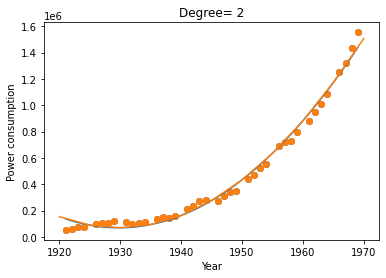

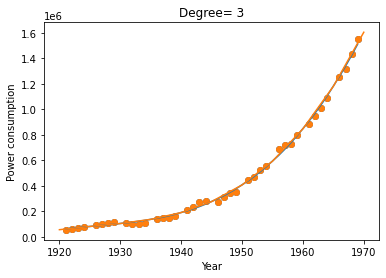

In [10]:
# Doing a polynomial regression: Comparing linear, quadratic and cubic fits
# Pipeline helps you associate two models or objects to be built sequentially with each other, 
# in this case, the objects are PolynomialFeatures() and LinearRegression()

r2_train = []
r2_test = []
degrees = [1, 2, 3]

for degree in degrees:
    pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=degree)),
                     ('model', LinearRegression())])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2_test.append(metrics.r2_score(y_test, y_pred))
    
    # training performance
    y_pred_train = pipeline.predict(X_train)
    r2_train.append(metrics.r2_score(y_train, y_pred_train))
    
# plot predictions and actual values against year
    fig, ax = plt.subplots()
    ax.set_xlabel("Year")                                
    ax.set_ylabel("Power consumption")
    ax.set_title("Degree= " + str(degree))
    
    # train data in blue
    ax.scatter(X_train, y_train)
    ax.plot(X_train, y_pred_train)
    
    # test data
    ax.scatter(X_train, y_train)
    ax.plot(X_test, y_pred)
    
    plt.show()

In [11]:
# respective test r-squared scores of predictions
print(degrees)
print(r2_train)
print(r2_test)

[1, 2, 3]
[0.8423747402176137, 0.9908896744553698, 0.9979789881922152]
[0.816517046382681, 0.9876080502675171, 0.9984897454348863]
